In [ ]:
# Import necessary libraries
import requests  # For downloading data from the internet
from bs4 import BeautifulSoup  # For parsing HTML content
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating charts and visualizations
from datetime import datetime, timedelta  # For working with dates and times
from scipy import stats
import seaborn as sns

# URLs for different interest rates from the FRED (Federal Reserve Economic Data) website
urls = {
    "federal_funds": "https://fred.stlouisfed.org/data/FEDFUNDS.txt",
    "1_year_treasury_bill": "https://fred.stlouisfed.org/data/GS1.txt",
    "10_year_treasury_constant_maturity": "https://fred.stlouisfed.org/data/GS10.txt"
}

# Function 1: Download Web Page Content
def download_webpage(url):
    """Download the webpage content from the provided URL."""
    response = requests.get(url)
    response.raise_for_status()
    return response.content

# Function 2: Parse HTML Content
def parse_html(content):
    """Parse HTML content and extract plain text using BeautifulSoup."""
    soup = BeautifulSoup(content, 'html.parser')
    return soup.get_text()

# Function 3: Extract Data Lines from Text
def extract_data_lines(text_content):
    """Extract and return data lines from plain text, ignoring headers and empty lines."""
    lines = text_content.splitlines()
    data_lines = []
    start_collecting = False

    for line in lines:
        if line.startswith("DATE"):
            start_collecting = True
            continue
        if start_collecting and line.strip():
            data_lines.append(line)
    return data_lines

# Function 4: Parse Lines into Structured Data
def parse_lines_to_columns(data_lines):
    """Parse each line into columns (values and dates)."""
    data = [line.split() for line in data_lines]
    flat_data = [item[0] for item in data]
    values = flat_data[0::2]  # Interest rates
    dates = flat_data[1::2]   # Dates
    return values, dates

# Function 5: Create DataFrame from Values and Dates
def create_dataframe(values, dates):
    """Create a Pandas DataFrame from values and dates."""
    df = pd.DataFrame({
        'Date': pd.to_datetime(dates, errors='coerce'),
        'Value': pd.to_numeric(values, errors='coerce')
    })
    return df

# Main Function: Download and Parse Interest Rate Data
def download_and_parse_interest_rates(url):
    """Download, parse, and return interest rate data as a Pandas DataFrame."""
    content = download_webpage(url)
    text_content = parse_html(content)
    data_lines = extract_data_lines(text_content)
    values, dates = parse_lines_to_columns(data_lines)
    df = create_dataframe(values, dates)
    return df

# Get the current date
current_date = datetime.now()

# Calculate the date 10 years ago
ten_years_ago = current_date - timedelta(days=365 * 10)

# Download Federal Funds, convert to a data frame and print descriptive statistics:
#url = 'https://fred.stlouisfed.org/data/FEDFUNDS.txt'
#df = download_and_parse_interest_rates(url)

# Filter the DataFrame for the last 10 years
#filtered_df = df[df['Date'] >= ten_years_ago]
#print(filtered_df.describe())


# Download 1_year_treasury_bill, convert to a data frame and print descriptive statistics:
#url = 'https://fred.stlouisfed.org/data/GS1.txt'
#df = download_and_parse_interest_rates(url)

# Filter the DataFrame for the last 10 years
#filtered_df = df[df['Date'] >= ten_years_ago]
#print(filtered_df.describe())


# Download 10_year_treasury_constant_maturity, convert to a data frame and print descriptive statistics:
url = 'https://fred.stlouisfed.org/data/GS10.txt'
df = download_and_parse_interest_rates(url)

# Filter the DataFrame for the last 10 years
filtered_df = df[df['Date'] >= ten_years_ago]
print(filtered_df.describe())





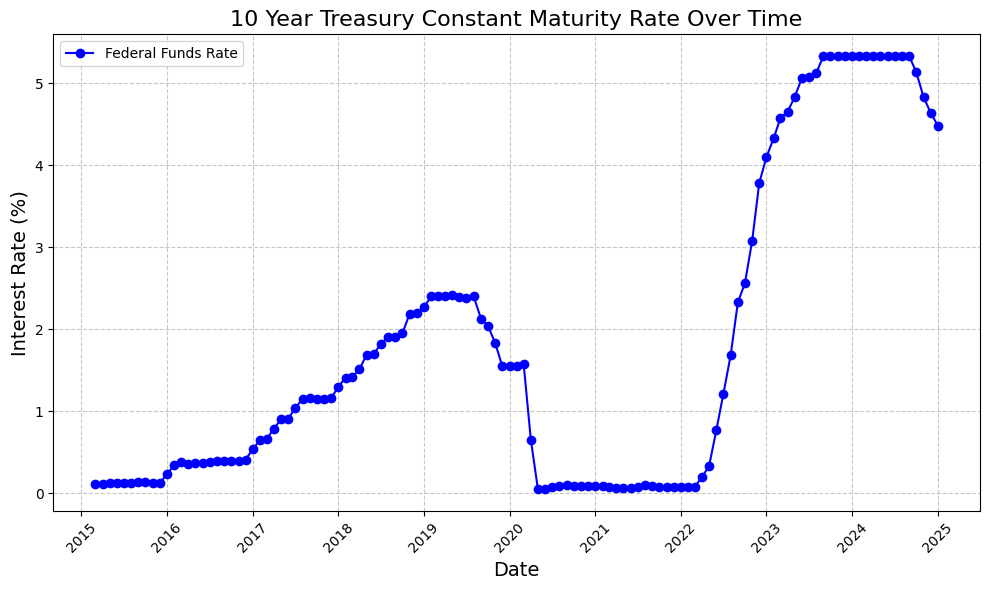

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(filtered_df['Date'], filtered_df['Value'], marker='o', linestyle='-',
         color='b', label='Federal Funds Rate')

# Add labels and title
plt.title('10 Year Treasury Constant Maturity Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

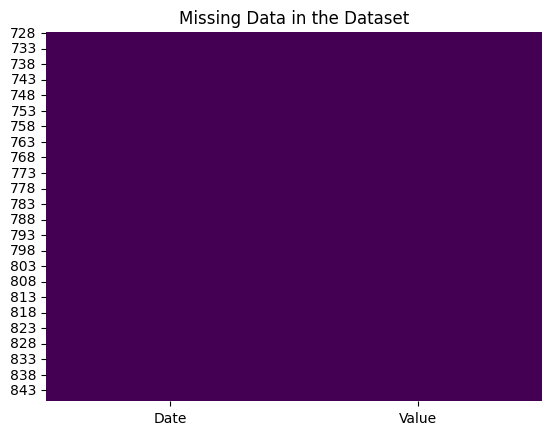

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing data
missing_data = filtered_df.isnull()

# Visualize missing data
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data in the Dataset')
plt.show()

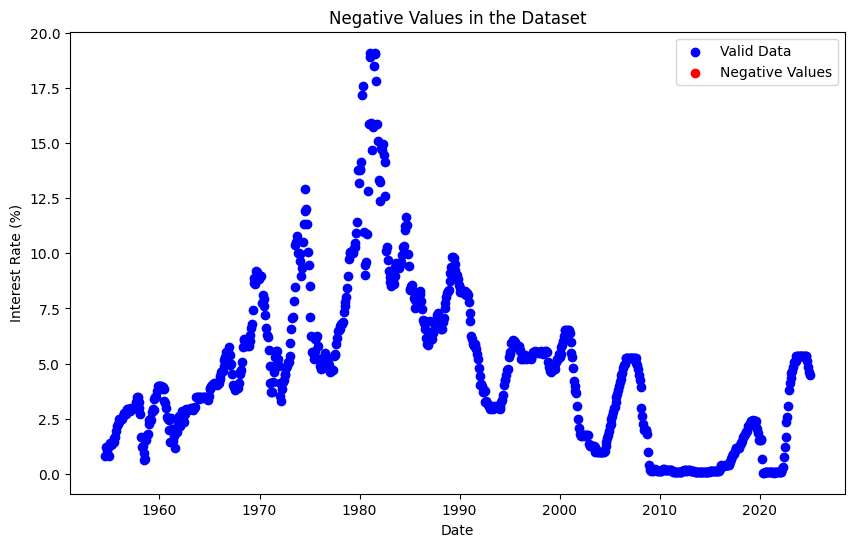

In [ ]:
# Check for negative values
negative_values = filtered_df[filtered_df['Value'] < 0]

# Plot the data with negative values highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Value'], color='b', label='Valid Data')
plt.scatter(negative_values['Date'], negative_values['Value'], color='r', label='Negative Values')
plt.title('Negative Values in the Dataset')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

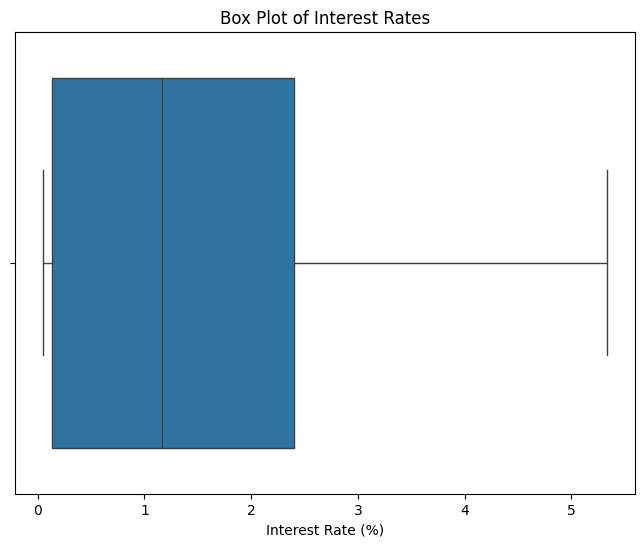

In [ ]:
# Box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['Value'])
plt.title('Box Plot of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.show()

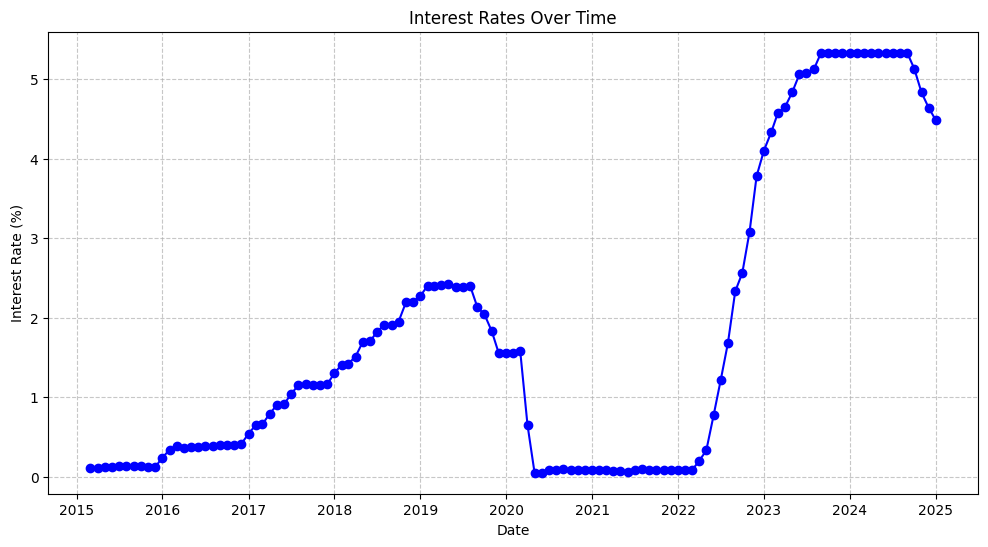

In [ ]:
# Line plot to check for inconsistencies
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Value'], marker='o', linestyle='-', color='b')
plt.title('Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Identify Missing Data
missing_values_count = df.isnull().sum()

# Display the count of missing values
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
Date     9
Value    9
dtype: int64


In [ ]:
# Identify Negative Values
negative_values = df[df['Value'] < 0]
print("\nNegative Values:")
print(negative_values)


Negative Values:
Empty DataFrame
Columns: [Date, Value]
Index: []


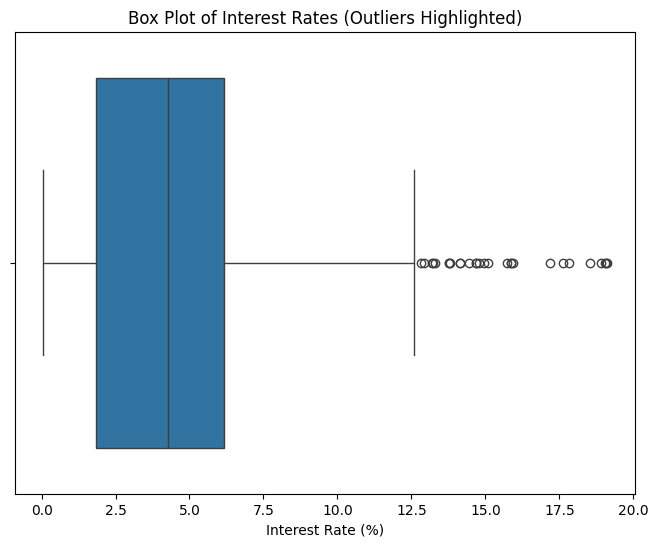

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Interest Rates (Outliers Highlighted)')
plt.xlabel('Interest Rate (%)')
plt.show()